# Causal Inference Lesson 1

This provides the first lesson and follows the tutorial on the [DoWhy Website](https://microsoft.github.io/dowhy/)

There is also an [open-source book with code and tutorials](http://causalinference.gitlab.io/) accompanying the DoWhy framework.

In [2]:
# import all relevant libs
import pandas as pd
import numpy as np
from dowhy import (
    CausalModel,
    datasets
)

# import helper libs
from matplotlib import pyplot as plt
import seaborn as sns

## Step 1: Simple Causal Inference Analysis

This will load a dataset, display it and outline the causal implications.

The linear dataset in this case will generate a dictionary with the dataframe itself and various meta information based on the creation process of the data. It contains:

```
['df', 'treatment_name', 'outcome_name', 'common_causes_names', 
'instrument_names', 'effect_modifier_names', 'frontdoor_variables_names', 
'dot_graph', 'gml_graph', 'ate']
```

treatment_name ['v0']
outcome_name y
common_causes_names ['W0', 'W1', 'W2', 'W3', 'W4']
instrument_names ['Z0', 'Z1', 'Z2']
effect_modifier_names []
frontdoor_variables_names []
dot_graph digraph { U[label="Unobserved Confounders"]; U->y;v0->y;U->v0;W0-> v0; W1-> v0; W2-> v0; W3-> v0; W4-> v0;Z0-> v0; Z1-> v0; Z2-> v0;W0-> y; W1-> y; W2-> y; W3-> y; W4-> y;}
gml_graph graph[directed 1node[ id "y" label "y"]node[ id "Unobserved Confounders" label "Unobserved Confounders"]edge[source "Unobserved Confounders" target "y"]node[ id "W0" label "W0"] node[ id "W1" label "W1"] node[ id "W2" label "W2"] node[ id "W3" label "W3"] node[ id "W4" label "W4"]node[ id "Z0" label "Z0"] node[ id "Z1" label "Z1"] node[ id "Z2" label "Z2"]node[ id "v0" label "v0"]edge[source "Unobserved Confounders" target "v0"]edge[source "v0" target "y"]edge[ source "W0" target "v0"] edge[ source "W1" target "v0"] edge[ source "W2" target "v0"] edge[ source "W3" target "v0"] edge[ source "W4" target "v0"]edge[ source "Z

,Z0,Z1,Z2,W0,W1,W2,W3,W4,y
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.08000,0.503263,0.420000,0.001641,-0.844635,0.064623,-0.445940,-0.012566,3.774307
std,0.27266,0.305888,0.496045,1.128250,0.947308,0.971277,1.034486,0.934924,8.433894
min,0.00000,0.014822,0.000000,-2.507185,-3.145373,-2.095217,-2.993989,-2.076599,-17.067835
25%,0.00000,0.207522,0.000000,-0.827924,-1.532311,-0.606986,-1.012556,-0.577649,-1.030718
50%,0.00000,0.482639,0.000000,-0.072228,-0.788719,0.102231,-0.445146,-0.057923,4.753764
75%,0.00000,0.801427,1.000000,0.855061,-0.088981,0.652570,0.268615,0.532277,9.456770
max,1.00000,0.992448,1.000000,3.117490,1.011478,2.387580,2.005385,2.231939,22.574611


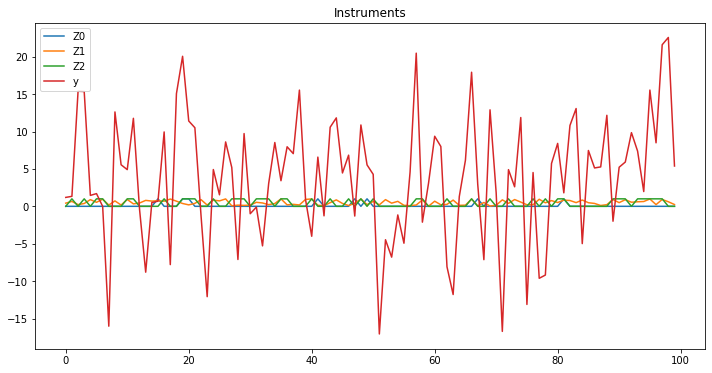

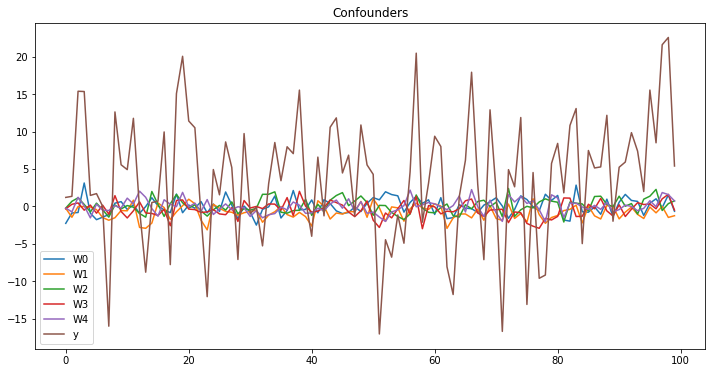

In [38]:
# load some sample data
confounders = 5
instruments = 3
data = datasets.linear_dataset(
    beta=10,
    num_common_causes=confounders,
    num_instruments=instruments,
    num_samples=100,
    treatment_is_binary=True,
)

for key in data:
    if key != "df":
        print(key, data[key])

# display the data
data['df'][['Z{}'.format(i) for i in range(instruments)] + ['y']].plot(figsize=(12, 6), title="Instruments")
data['df'][['W{}'.format(i) for i in range(confounders)] + ['y']].plot(figsize=(12, 6), title="Confounders")
data['df'].describe()

As you can see, the treatment variable (`v0`) is a binary indicator, whereas the common causes are moving in tandem with the outcome variables.

The next step is to actually build a causal model:

In [13]:
??CausalModel

Init signature:
CausalModel(
    data,
    treatment,
    outcome,
    graph=None,
    common_causes=None,
    instruments=None,
    effect_modifiers=None,
    estimand_type='nonparametric-ate',
    proceed_when_unidentifiable=False,
    missing_nodes_as_confounders=False,
    **kwargs,
)
Source:        
class CausalModel:

    """Main class for storing the causal model state.

    """

    def __init__(self, data, treatment, outcome, graph=None,
                 common_causes=None, instruments=None,
                 effect_modifiers=None,
                 estimand_type="nonparametric-ate",
                 proceed_when_unidentifiable=False,
                 missing_nodes_as_confounders=False,
                 **kwargs):
        """Initialize data and create a causal graph instance.

        Assigns treatment and outcome variables.
        Also checks and finds the common causes and instruments for treatment
        and outcome.

        At least one of graph, common_causes or instrume

In [37]:
model = CausalModel(
    data=data['df'],
    treatment=data["treatment_name"],
    outcome=data["outcome_name"],
    graph=data["gml_graph"]
)